In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('hul.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

In [3]:
features = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']
target = 'Close'

In [4]:
sequence_length = 100

In [5]:
X = []
y = []

for i in range(len(data) - sequence_length):
    X.append(data[features].iloc[i:i+sequence_length].values)
    y.append(data[target].iloc[i+sequence_length])

In [6]:
X = np.array(X)
y = np.array(y).reshape(-1, 1)

In [7]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X.reshape(-1, X.shape[2])).reshape(X.shape)
y_scaled = scaler_y.fit_transform(y)

In [8]:
X_train = X_scaled[:int(0.8*len(X))]
X_test = X_scaled[int(0.8*len(X)):]
y_train = y_scaled[:int(0.8*len(y))]
y_test = y_scaled[int(0.8*len(y)):]


In [9]:
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, len(features)), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

c:\Users\ghrua\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [12]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 270ms/step - loss: 0.0035 - val_loss: 0.0514
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - loss: 0.0011 - val_loss: 0.0246
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 356ms/step - loss: 6.2021e-04 - val_loss: 0.0091
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - loss: 3.3662e-04 - val_loss: 9.2114e-04
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - loss: 1.5912e-04 - val_loss: 0.0010
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - loss: 1.5209e-04 - val_loss: 0.0011
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 35s 994ms/step - loss: 1.3307e-04 - val_loss: 0.0014
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - loss: 1.1696e-04 - val_loss: 9.5296e-04
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 426ms/step - loss: 1.2167e-04 - val_loss: 8.9503e-04
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 507ms/step - loss: 1.0058e-04 - val_loss: 7.5672e-04
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 9.5284e-05 - val_loss: 8.1

In [13]:
y_test_pred_scaled = model.predict(X_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_scaled)

222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step


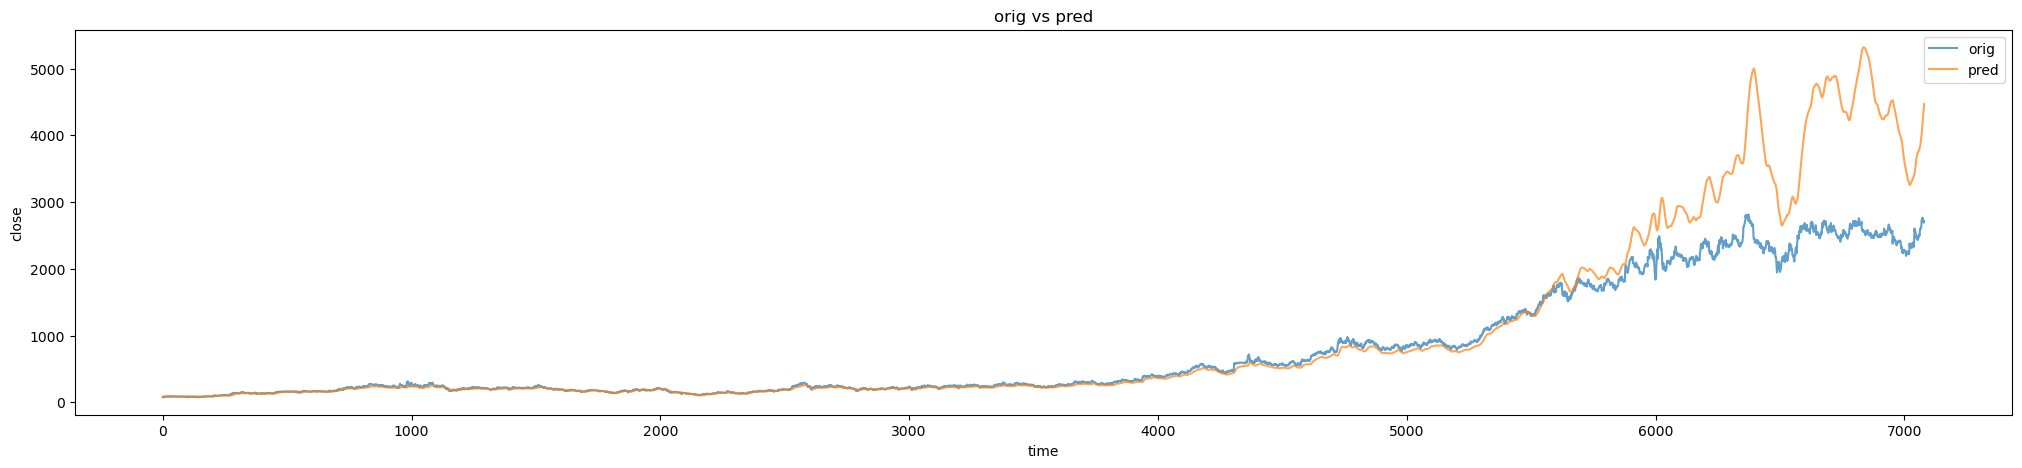

In [14]:
plt.figure(figsize=(25, 5))
plt.plot(y_test_actual, label='orig', alpha=0.7)
plt.plot(y_test_pred, label='pred', alpha=0.7)
plt.title('orig vs pred')
plt.xlabel('time')
plt.ylabel('close')
plt.legend()
plt.show()

In [15]:
y_test_pred_scaled = model.predict(X_test)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


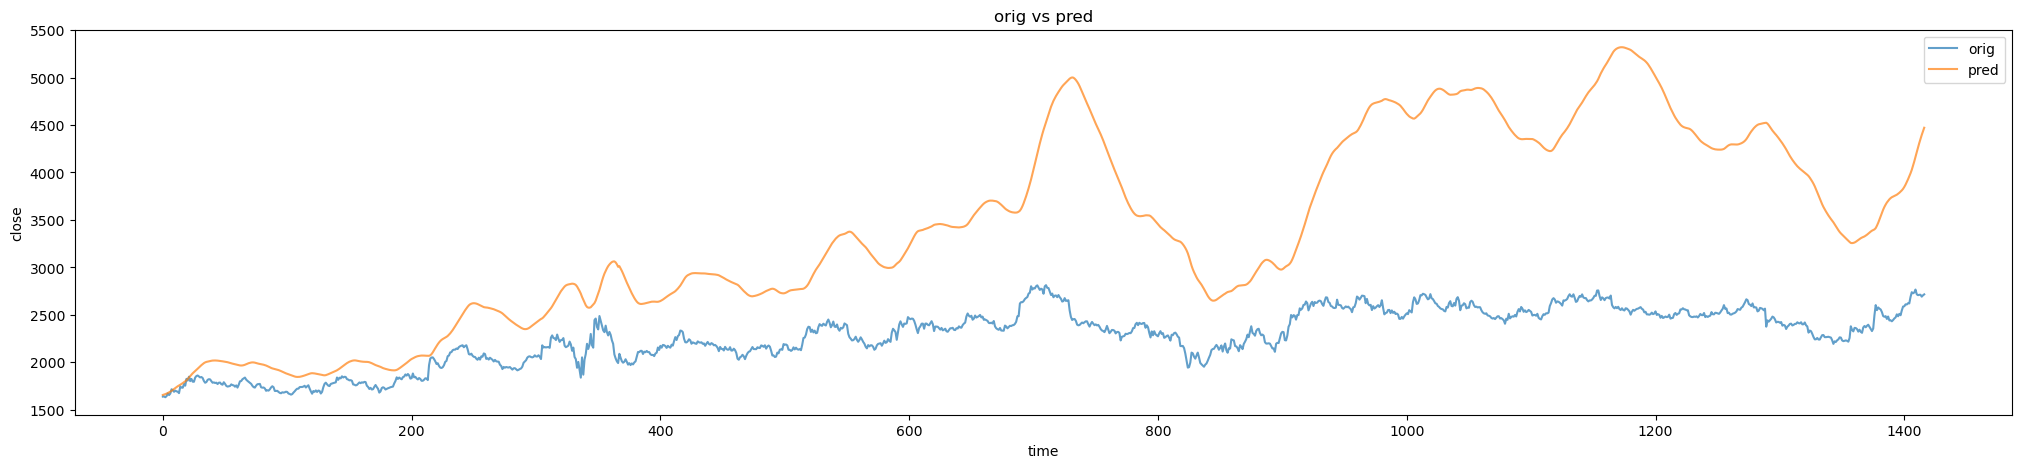

In [16]:
plt.figure(figsize=(25, 5))
plt.plot(y_test_actual, label='orig', alpha=0.7)
plt.plot(y_test_pred, label='pred', alpha=0.7)
plt.title('orig vs pred')
plt.xlabel('time')
plt.ylabel('close')
plt.legend()
plt.show()

In [17]:
y_scaled.size

7081